<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data205_Project_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [ ]:
# .json file data imported as pandas data frame
df = pd.read_json('https://data.montgomerycountymd.gov/resource/usip-62e2.json')

In [ ]:
# Evaluating initial data 
df

,filenum,created_dt,source,allegation,incident_status,finding
0,15-0200,2015-11-09T00:00:00.000,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN
1,16-0101,2016-05-10T00:00:00.000,Internal,Use of Force,Active,NaN
2,16-0101,2016-05-10T00:00:00.000,Internal,Abuse of Authority,Active,NaN
3,16-0101,2016-05-10T00:00:00.000,Internal,Conformance to Law,Active,NaN
4,15-0200,2015-11-09T00:00:00.000,External,Courtesy,Active,NaN
...,...,...,...,...,...,...
995,19-0192,2019-10-14T00:00:00.000,Internal,Neglect of Duty/Unsatisfactory Performance,Completed,Administrative Closure
996,14-0029,2014-02-10T00:00:00.000,Internal,Conduct Unbecoming,Completed,Administrative Closure
997,14-0226,2014-11-26T00:00:00.000,Internal,Maintenance of Property,Completed,Sustained
998,16-0040,2016-02-26T00:00:00.000,External,Neglect of Duty/Unsatisfactory Performance,Completed,No Corrective Action Tak


In [ ]:
# Changing Date to datetime
df.created_dt = pd.to_datetime(df.created_dt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filenum          1000 non-null   object        
 1   created_dt       1000 non-null   datetime64[ns]
 2   source           1000 non-null   object        
 3   allegation       997 non-null    object        
 4   incident_status  1000 non-null   object        
 5   finding          830 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 47.0+ KB


In [ ]:
# add a column for Year
df['Year'] = df['created_dt'].dt.year
df.head(1)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015


In [ ]:
df.incident_status.unique()

array(['Active', 'Completed'], dtype=object)

In [ ]:
df.finding.unique()

array([nan, 'Administrative Closure', 'Declined', 'Unfounded',
       'Exonerated', 'No Corrective Action Tak',
       'Corrective Action Taken', 'Sustained', 'Insufficent Evidence',
       'Policy Failure'], dtype=object)

In [ ]:
df.describe()

,Year
count,1000.000000
mean,2015.221000
std,2.345989
min,2013.000000
25%,2014.000000
50%,2014.000000
75%,2015.000000
max,2021.000000


In [ ]:
df.allegation.unique()

array(['Neglect of Duty/Unsatisfactory Performance', 'Use of Force',
       'Abuse of Authority', 'Conformance to Law', 'Courtesy',
       'Conduct Unbecoming', 'Att to Duty/Use Alch-Drugs',
       'Discrimination/Harassment', 'Discrim/Race/Sex',
       'Abuse of Process', 'Ineffective Police Action',
       'Carry Credent/Identification', 'Untruthful Statements',
       'Secondary Employment', 'Property', 'Punctuality',
       'Compliance with Orders', 'Maintenance of Property',
       'Conf T/L Traffic', 'Absent W/O Leave', 'courtesy',
       'Use of Force (Count two)', 'Conformance to Law (Count two)', nan,
       'Neglect of Duty', 'Conformance to Law Re: Criminal',
       'Conformance to Law Deadly Force', 'conduct unbecoming',
       'Neglect of Duty/Unsatisfactory Performance (Count three)',
       'Carry ID on Duty&OD While Armed',
       'Neglect of Duty/Unsatisfactory Performance (Count two)',
       'Use of Force (Count three)'], dtype=object)

In [ ]:
df_allegation = pd.DataFrame(df.allegation.value_counts())
df_allegation.head()

,allegation
Neglect of Duty/Unsatisfactory Performance,317
Courtesy,170
Conformance to Law,155
Conduct Unbecoming,96
Use of Force,56


In [ ]:
# Successfully creating excel sheet with cell output
df_allegation.to_excel("./allegationdf.xlsx")

In [ ]:
df_findings = pd.DataFrame(df.finding.value_counts())
df_findings

,finding
No Corrective Action Tak,279
Corrective Action Taken,170
Administrative Closure,127
Exonerated,77
Sustained,65
Declined,47
Unfounded,41
Insufficent Evidence,22
Policy Failure,2


In [ ]:
# Successfully creating excel sheet with cell output
df_findings.to_excel("./findingsdf.xlsx")

In [ ]:
findingsdf = pd.read_csv('findingsdf.csv')

In [ ]:
findingsdf.head()

,Finding,Count
0,No Corrective Action Tak,279
1,Corrective Action Taken,170
2,Administrative Closure,127
3,Exonerated,77
4,Sustained,65


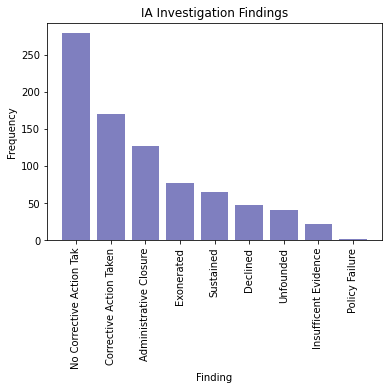

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.bar(df_findings.index, df_findings.finding, facecolor='navy', alpha=0.5, )
plt.title('IA Investigation Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

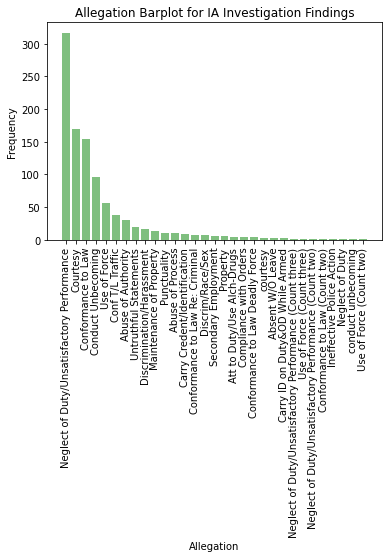

In [ ]:
plt.bar(df_allegation.index, df_allegation.allegation, facecolor='green', alpha=0.5, )
plt.title('Allegation Barplot for IA Investigation Findings')
plt.xlabel('Allegation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

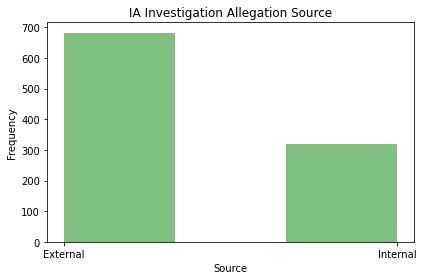

In [ ]:
plt.hist(df.source, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Allegation Source')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.source.value_counts()

External    682
Internal    318
Name: source, dtype: int64

In [ ]:
318+682

1000

In [ ]:
318/1000 * 100
682/1000 * 100

68.2

In [ ]:
df.head(10)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,15-0200,2015-11-09,External,Neglect of Duty/Unsatisfactory Performance,Active,NaN,2015
1,16-0101,2016-05-10,Internal,Use of Force,Active,NaN,2016
2,16-0101,2016-05-10,Internal,Abuse of Authority,Active,NaN,2016
3,16-0101,2016-05-10,Internal,Conformance to Law,Active,NaN,2016
4,15-0200,2015-11-09,External,Courtesy,Active,NaN,2015
5,15-0200,2015-11-09,External,Conduct Unbecoming,Active,NaN,2015
6,16-0101,2016-05-10,Internal,Att to Duty/Use Alch-Drugs,Active,NaN,2016
7,16-0196,2016-08-17,Internal,Conformance to Law,Active,NaN,2016
8,16-0196,2016-08-17,Internal,Conduct Unbecoming,Active,NaN,2016
9,19-0093,2019-06-10,External,Courtesy,Active,Administrative Closure,2019


In [ ]:
df.allegation.value_counts()

Neglect of Duty/Unsatisfactory Performance                  317
Courtesy                                                    170
Conformance to Law                                          155
Conduct Unbecoming                                           96
Use of Force                                                 56
Conf T/L Traffic                                             38
Abuse of Authority                                           31
Untruthful Statements                                        19
Discrimination/Harassment                                    17
Maintenance of Property                                      13
Punctuality                                                  10
Abuse of Process                                             10
Carry Credent/Identification                                  9
Conformance to Law Re: Criminal                               8
Discrim/Race/Sex                                              8
Secondary Employment                    

In [ ]:
#year and corrective
df_corrective = df.groupby("Year")['finding']
df_corrective.head()

In [ ]:
df_corrective=df[(df['finding']=="Corrective Action Taken")]
df_corrective.head()

In [ ]:
df_no_corrective=df[(df['finding']=="No Corrective Action Tak")]
df_no_corrective.head()

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = df.Year
No_Corrective = df_no_corrective.finding.count()
Corrective = df_corrective.finding.count()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, No_Corrective, width, label='No Corrective',color='green', alpha = 0.5)
rects2= ax.bar(x + width/2, Corrective, width, label='Corrective', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Processed')
ax.set_title('Comparing Release versus Committment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.hist(df.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Allegations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(df_corrective.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Corrective Action by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 350)
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(df_no_corrective.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation No Corrective Action by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 350)
plt.tight_layout()
plt.show()

In [ ]:
df.count()

In [ ]:
df_corrective.count()

In [ ]:
df_no_corrective.count()

In [ ]:
df_active=df[(df['incident_status']=="Active")]
df_active.head()

In [ ]:
df_active.count()

In [ ]:
plt.hist(df_active.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Active Investigations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 350)
plt.tight_layout()
plt.show()

In [ ]:
df_completed=df[(df['incident_status']=="Completed")]
df_completed.head()

In [ ]:
df_completed.count()

In [ ]:
plt.hist(df_completed.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Active Investigations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.ylim (top = 350)
plt.tight_layout()
plt.show()

In [ ]:
# percent corrective action
df.count()
#df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100

In [ ]:
df_corrective.count()


In [ ]:
170/1000 * 100

17.0